In [1]:
from os import environ
import matplotlib.pyplot as plt
from seaborn import boxplot, countplot, heatmap, histplot
from pandas import read_sql
from psycopg2 import connect

connection = connect(
    database=environ["POSTGRES_DB_NAME"],
    user=environ["POSTGRES_DB_USER"],
    password=environ["POSTGRES_DB_PASSWORD"],
    host=environ["POSTGRES_DB_HOST"],
    port=environ["POSTGRES_DB_PORT"]
)

df = read_sql("SELECT * FROM customers", connection)
connection.close()

/var/folders/xp/y5m5671j71s_kss5gk4465qm0000gn/T/ipykernel_29840/1394346036.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = read_sql("SELECT * FROM customers", connection)


In [2]:
# Show the first rows of the db
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Show db structure summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [4]:
# Describe statistics for numeric columns
df.describe() 

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Counts churn categories
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

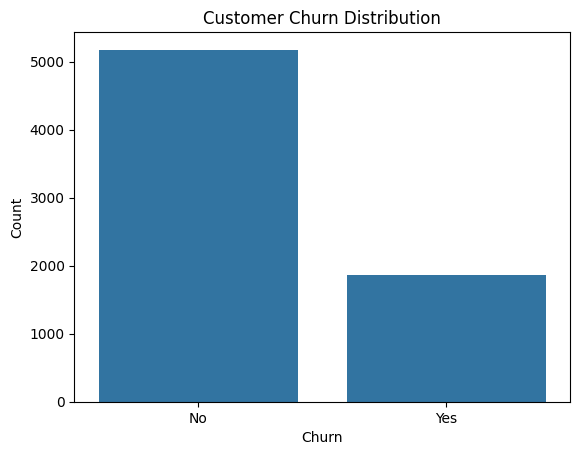

In [6]:
# Churn Distribution
countplot(data=df, x="churn")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

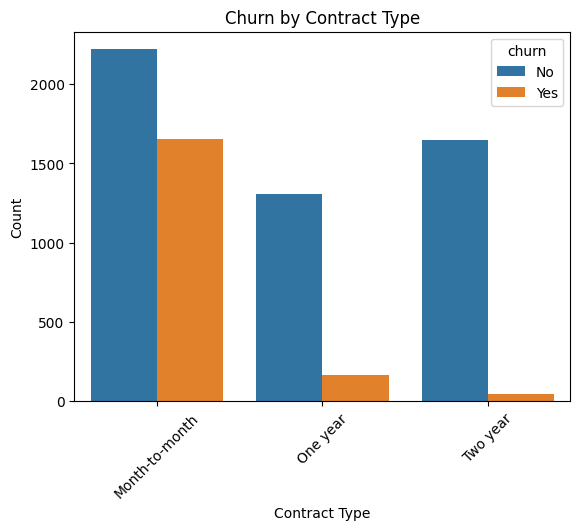

In [7]:
# Churn by Contract Type
countplot(data=df, x="contract", hue="churn")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

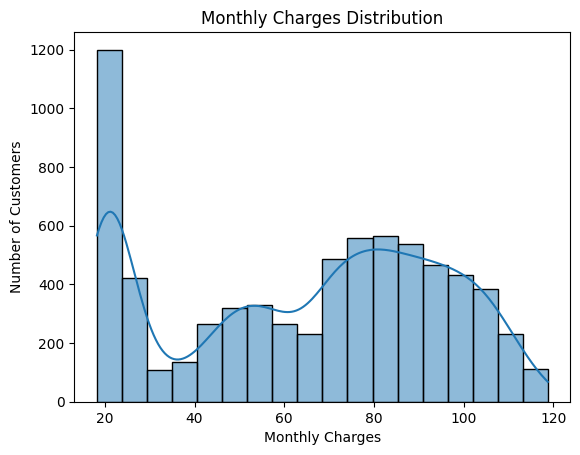

In [8]:
# Monthly Charges Distribution
histplot(df["monthlycharges"], kde=True)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

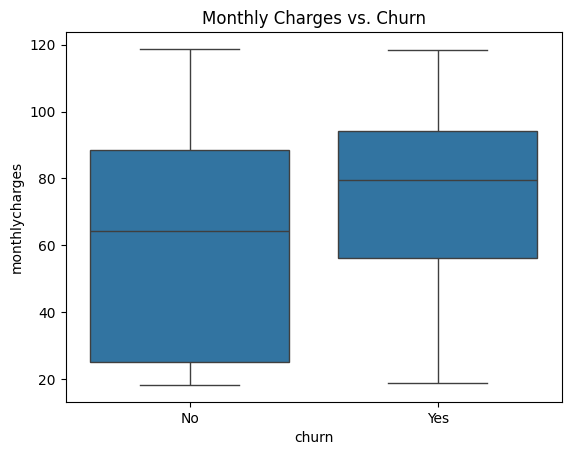

In [9]:
# Boxplot of Monthly Charges
boxplot(data=df, x="churn", y="monthlycharges")
plt.title("Monthly Charges vs. Churn")
plt.show()

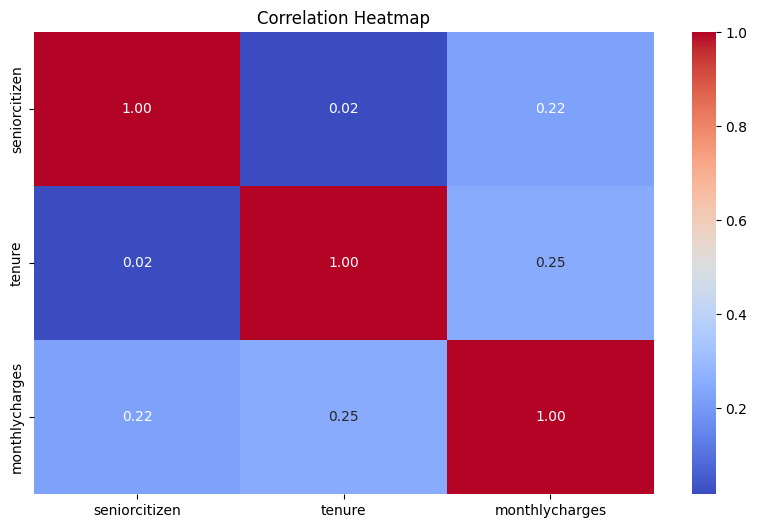

In [10]:
# Correlation Heatmap
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()